Get started
===
Q2. [10 marks] Examine the parallel data and answer the following questions.
---
1.Plot (choose sensible graphs) the distribution of sentence lengths in the English and Japanese and their correlation. 

What do you infer from this about translating between these languages?

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

work_dir = os.getcwd()
data = os.path.join(work_dir, 'data')
text_en = os.path.join(data, 'text.en')
text_fr = os.path.join(data, 'text.fr')

text.en most frequent length: [(8, 1660), (7, 1554), (9, 1485), (10, 1149), (6, 1137)]


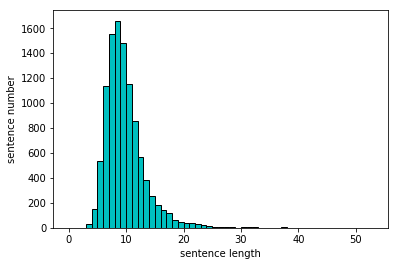

In [22]:
def plot_distribution(text_, color='c', edgecolor="black"):

    with open(text_) as f:
        text_len = [len(line.split()) for line in f.readlines()]
    plt.hist(text_len, bins=np.arange(start=0, stop=max(text_len), step=1), color=color, edgecolor=edgecolor)
    plt.xlabel('sentence length')
    plt.ylabel('sentence number')
    count = Counter(text_len)
    print(text_[-7:],"most frequent length:", count.most_common(5))  
plot_distribution(text_en)

text.fr most frequent length: [(12, 1098), (11, 1038), (13, 1006), (10, 908), (14, 880)]


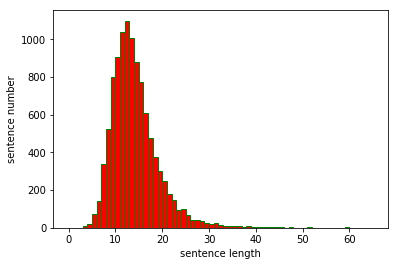

In [23]:
plot_distribution(text_fr, 'r', 'g')

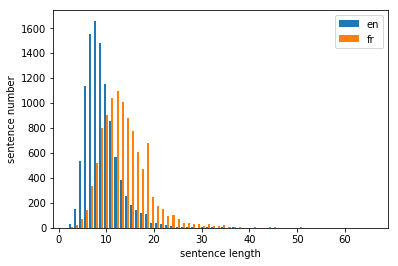

In [32]:
with open(text_en) as f:
    en_len = [len(line.split()) for line in f.readlines()]
#     max_len_en = max(text_len)
with open(text_fr) as f:
    fr_len = [len(line.split()) for line in f.readlines()]
#     max_len_fr = max(text_len)
# bins_max = max(max_len_en, max_len_fr) # 54
plt.hist([en_len,fr_len],bins=60,label=['en', 'fr'])
plt.ylabel('sentence number')
plt.xlabel('sentence length')
_ =plt.legend()

In [25]:
len(en_len)

10500

What do you infer from this about translating between these languages?

---
> Average english sentences have shorter length than Japanese..

2.How many word tokens are in the English data? In the Japanese?

In [141]:
def get_token_num(text_):
    with open(text_) as f:
        text_len = [len(line.split()) for line in f.readlines()]
    token_num = sum(text_len)
#         print(token_num)
    return token_num
print('English word tokens number:', get_token_num(text_en))
print('Japanese word tokens number:', get_token_num(text_fr))

English word tokens number: 97643
Japanese word tokens number: 143580


3.How many word types are in the English data? In the Japanese data?

In [34]:
def get_word_types(text_):
    token_list = []
    with open(text_) as f:
        text_tokens = [line.split() for line in f.readlines()]
        for i in text_tokens: token_list.extend(i)
#         token_list = [i.lower() for i in token_list]
        word_type = set(token_list)
        return len(word_type)
print('English word types:' ,get_word_types(text_en))
print('japanese word types:' ,get_word_types(text_fr))

English word types: 7211
japanese word types: 8251


4.How many word tokens will be replaced by _UNK in English? In Japanese?

In [35]:
def get_UNK_nums(text_):
    from collections import Counter
    with open(text_) as f:
        token_list = []
        num_UNK = 0
        text_tokens = [line.split() for line in f.readlines()]
#         token_list = [i.lower() for i in token_list]
        for i in text_tokens: token_list.extend(i)
    token_counter = Counter(token_list)
    UNK_list = [k for k,v in token_counter.items() if v==1]
    return len(UNK_list)
print('English UNK numbers:',get_UNK_nums(text_en))
print('Japanese UNK numbers:',get_UNK_nums(text_fr))

English UNK numbers: 3384
Japanese UNK numbers: 4171


5.Given the observations above, how do you think the NMT system will be affected by differences in sentence length, type/ token ratios, and unknown word handling?

Part 2: Exploring the model [30 marks]
===
Q3. [10 marks] Decoding

1.Currently, the model implements greedy decoding, of always choosing the maximum-probability word at each time step. Can you explain why this might be problematic? Give language specific examples as part of your answer.

2.How would you modify this decoder to do beam search—that is, to consider multiple possible translations at each time step. NOTE: You needn’t implement beam search. The purpose of this question is simply for you to think through and clearly explain how you would do it.

3.Often with beam search (and greedy decoding), the decoder will output translations which are shorter than one would expect, as such length normalization is often used to fix this. Why does the decoder favour short sentences? What is a problem that length normalization can introduce?

In [ ]:
"""
1). Sentences with shorter length have a larger probability.

2). 
"""

Q4. [10 marks] MOAR layers!

1. Change the number of layers in the encoder = 2, decoder = 3. Retrain the system.
2. Draw a diagram showing this new architecture (you may ignore the memory cell of the LSTM).
3. What effect does this change have on dev-set perplexity, BLEU score and the training loss (all in comparison to the baseline)? Can you explain why it does worse/better on the dev set than the baseline single layer model? (For reference, the baseline was trained for 12 epochs.) Can you explain why it does worse/better on the training set than the baseline? Is there a difference between the dev set and training set performance? Why is this case?

In [4]:
# TODO Q4.evaluate pp, BLEU, loss
%run nmt_translate.py
# baseline：enc_1, dec_1
compute_dev_bleu()
compute_dev_pplx()

  0%|          | 0/500 [00:00<?, ?it/s]

vocab size, en=3713, fr=3949
--------------------------------------------------
Training progress will be logged in:
	model/train_10000sen_1-1layers_100units_ja_en_exp1_NO_ATTN.log
--------------------------------------------------
Trained model will be saved as:
	model/seq2seq_10000sen_1-1layers_100units_ja_en_exp1_NO_ATTN.model
--------------------------------------------------
Existing model found
--------------------------------------------------
loading model ...
finished loading: model/seq2seq_10000sen_1-1layers_100units_ja_en_exp1_NO_ATTN.model
--------------------------------------------------


loss=4.841463:   1%|          | 6/500 [00:00<00:14, 33.36it/s]

BLEU: 14.470


loss=6.376895: 100%|██████████| 500/500 [00:13<00:00, 36.00it/s]

--------------------------------------------------
dev perplexity | 32.6035
# words in dev | 4557
--------------------------------------------------


32.603503581862554

In [5]:
model.c